In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [3]:
data = {"Area":[2600,3000,3200,3600,4000],"Price":[550000,565000,610000,680000,725000]}

In [4]:
data = pd.DataFrame(data)
data.head()

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


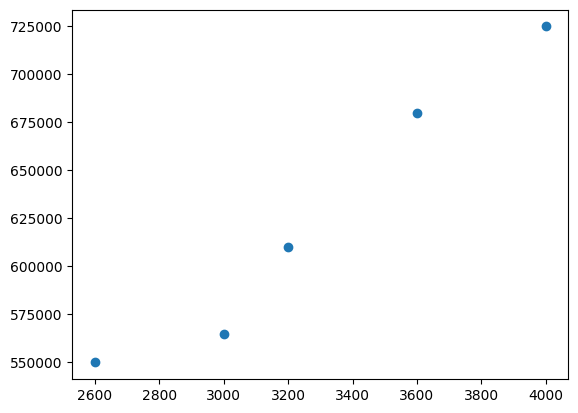

In [5]:
plt.scatter(data.Area,data.Price)

In [6]:
lr = linear_model.LogisticRegression()
lr.fit(data[['Area']],data['Price'])

LogisticRegression()

In [7]:
lr.predict([[3600]])
lr.score(data[['Area']],data['Price'])

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1.0

In [8]:
lr.coef_        # y=mx+c here coef is m

array([[-0.16928179],
       [-0.06091663],
       [-0.01015861],
       [ 0.07974736],
       [ 0.16060968]])

In [9]:
lr.intercept_   # here intercept is c

array([ 534.93374278,  219.61431486,   62.29093143, -251.75628973,
       -565.08269934])

In [10]:
lr.predict([[4500]])

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([725000], dtype=int64)

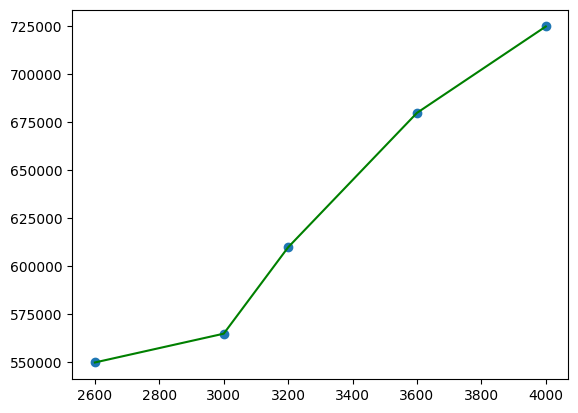

In [11]:
plt.scatter(data.Area,data.Price)
plt.plot(data['Area'],lr.predict(data[['Area']]),c='g')

In [12]:
data = pd.read_csv("./DATASET/homeprice.csv")
data.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [13]:
data['bedrooms'].fillna(data['bedrooms'].mode()[0],inplace=True)

In [14]:
lr = linear_model.LinearRegression()
lr.fit(data[['area','bedrooms','age']],data['price'])

LinearRegression()

In [15]:
lr.score(data[['area','bedrooms','age']],data['price'])

0.9534350855214517

In [16]:
data = pd.read_csv("./DATASET/hiring.csv")
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [17]:
data['experience'].fillna("zero",inplace=True)

In [18]:
from word2number import w2n
def change(n):
    return w2n.word_to_num(n)

data['experience']=data['experience'].apply(change)


In [19]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [20]:
data['test_score(out of 10)'].fillna(data['test_score(out of 10)'].mean(),inplace=True)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
lr.fit(data[['experience','test_score(out of 10)','interview_score(out of 10)']],data['salary($)'])

LinearRegression()

In [23]:
lr.score(data[['experience','test_score(out of 10)','interview_score(out of 10)']],data['salary($)'])

0.9639958361860579

In [24]:
lr.predict([[2,9,6]]),lr.predict([[12,10,10]])

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([53290.89255945]), array([92268.07227784]))

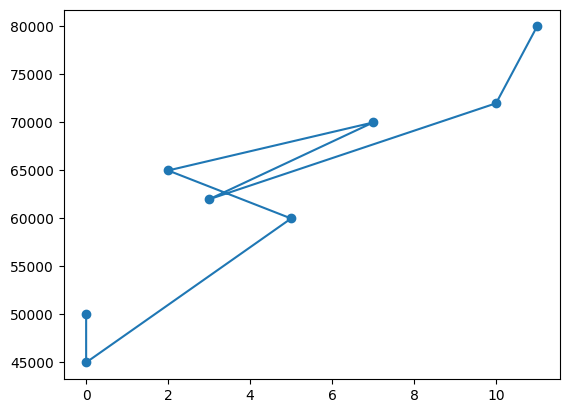

In [25]:
plt.plot(data['experience'],data['salary($)'],marker='o')

In [26]:
# Gradient descent is a technique used to minimize the cost function by updating the parameters
# Cost is a mathematical function that measures how far the predicted values are from original values or actual values

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.08
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n) * sum(x*(y-y_predicted))
        bd = -(2/n) * sum((y-y_predicted))
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost,i))


x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 4.96, b 1.44, cost 89.0 iteration 0
m 0.4991999999999983, b 0.26879999999999993, cost 71.10560000000002 iteration 1
m 4.451584000000002, b 1.426176000000001, cost 56.8297702400001 iteration 2
m 0.892231679999997, b 0.5012275199999995, cost 45.43965675929613 iteration 3
m 4.041314713600002, b 1.432759910400001, cost 36.35088701894832 iteration 4
m 1.2008760606719973, b 0.7036872622079998, cost 29.097483330142282 iteration 5
m 3.7095643080294423, b 1.4546767911321612, cost 23.307872849944438 iteration 6
m 1.4424862661541864, b 0.881337636696883, cost 18.685758762535738 iteration 7
m 3.4406683721083144, b 1.4879302070713722, cost 14.994867596913156 iteration 8
m 1.6308855378034224, b 1.0383405553279617, cost 12.046787238456794 iteration 9
m 3.2221235247119777, b 1.5293810083298451, cost 9.691269350698109 iteration 10
m 1.7770832372205707, b 1.1780607551353204, cost 7.8084968312098315 iteration 11
m 3.0439475772474127, b 1.5765710804477953, cost 6.302918117062937 iteration 12
m 1.8898457

In [27]:
data = {"name":['david','laura','sanjay','wei','jeff','aamir','venkat','virat','arthur','paul'],
        "math":[92,56,88,70,80,49,65,35,66,67],
        "cs":[98,68,81,80,83,52,66,30,68,73]
        }

data = pd.DataFrame(data)
data

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [28]:
x = data['math']
y = data['cs']

def gradient_descent(x,y):
    m_curr = b_curr = 0
    itr = 1000
    n = len(x)
    learning_rate = 0.0002
    

    for i in range(itr):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n) * sum(x*(y-y_predicted))
        bd = -(2/n) * sum((y-y_predicted))
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {},cost {}, iteration {} ".format(m_curr,b_curr,cost,i))


def predict_using_sklearn():
    lr = LinearRegression()
    lr.fit(data[['math']],data['cs'])
    return lr.coef_,lr.intercept_

gradient_descent(x,y)
m_s,b_s=predict_using_sklearn()
print("Using Skelearn : Coef {} Intercept {}".format(m_s,b_s))

m 1.9783600000000003, b 0.027960000000000002,cost 5199.1, iteration 0 
m 0.20975041279999962, b 0.0030470367999999894,cost 4161.482445460163, iteration 1 
m 1.7908456142986242, b 0.025401286955264,cost 3332.2237319269248, iteration 2 
m 0.37738163667530467, b 0.005499731626422651,cost 2669.4843523161976, iteration 3 
m 1.6409848166378898, b 0.023373894401807944,cost 2139.826383775145, iteration 4 
m 0.5113514173939655, b 0.0074774305434828076,cost 1716.5264071567592, iteration 5 
m 1.5212165764726306, b 0.021771129698498662,cost 1378.2272007804495, iteration 6 
m 0.6184191426785134, b 0.009075514323270572,cost 1107.8601808918404, iteration 7 
m 1.4254981563597626, b 0.020507724625171385,cost 891.7842215178443, iteration 8 
m 0.7039868810749315, b 0.010370210797388455,cost 719.0974036421305, iteration 9 
m 1.3490002310389348, b 0.01951553325074733,cost 581.0869686205, iteration 10 
m 0.7723719384951477, b 0.01142244086408669,cost 470.7897237271261, iteration 11 
m 1.2878632281408475, b 